# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Violita Andriana Widharma
- **Email:** violitaandriana2003@gmail.com
- **ID Dicoding:** violitaandriana

## **Menentukan Pertanyaan Bisnis**

- Apa saja 10 kategori produk yang memiliki total order tertinggi?
- Apa saja 10 kota yang memiliki total order tertinggi?
- Bagaimana perbandingan jumlah antara tipe pembayaran?
- Bagaimana skor kepuasan order dari customer?

## **Import Semua Packages/Library yang Digunakan**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### Gathering Data

1. Data untuk mengetahui penjualan produk berdasarkan kategorinya, didapat dari order_items_dataset.csv, dan product_category_name_translation.csv yang kemudian akan di-merge.

In [59]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/order_items_dataset.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/products_dataset.csv")
product_categories_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/product_category_name_translation.csv")

In [60]:
order_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

order_product_cat_df = pd.merge(
    left=order_product_df,
    right=product_categories_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

order_product_cat_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


2. Data untuk mengetahui penjualan produk berdasarkan kota, didapat dari orders_dataset.csv dan customers_dataset.csv yang kemudian akan di-merge.

In [61]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/orders_dataset.csv")
customers_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/customers_dataset.csv")

In [62]:
order_cust_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

order_cust_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


3. Data untuk mengetahui perbandingan jumlah tipe pembayaran.

In [63]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


4. Data untuk mengetahui skor review order.

In [64]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/violitaandriana/dicoding-dataset/main/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


5. Semua DataFrame

In [65]:
order_df = pd.merge(
    left=order_product_cat_df,
    right=order_cust_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df = pd.merge(
    left=order_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df = pd.merge(
    left=df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

### Assessing Data

Menilai tabel order_product_cat_df

In [66]:
order_product_cat_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111022.000000,111022.000000,111022.000000,111022.000000
mean,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.897507,30.212210,16.624966,23.042172
std,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.972723,16.190473,13.468184,11.717712
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [67]:
order_product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   product_category_name          111023 non-null  object 
 8   product_name_lenght            111023 non-null  float64
 9   product_description_lenght     111023 non-null  float64
 10  product_photos_qty             111023 non-null  float64
 11  product_weight_g               111022 non-null  float64
 12  product_length_cm             

In [68]:
print("Jumlah duplikasi: ",order_product_cat_df.duplicated().sum())
order_product_cat_df.isnull().sum()

Jumlah duplikasi:  0


order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

Menilai tabel order_cust_df

In [69]:
order_cust_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [70]:
order_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [71]:
print("Jumlah duplikasi: ",order_cust_df.duplicated().sum())
order_cust_df.isnull().sum()

Jumlah duplikasi:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Menilai tabel order_payments

In [72]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [73]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [74]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.isnull().sum()

Jumlah duplikasi:  0


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Menilai tabel order_reviews

In [75]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [76]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [77]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.isnull().sum()

Jumlah duplikasi:  0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Cleaning Data

#### Membersihkan tabel order_product_cat_df

Drop yang null (karena cuma ada 1 baris data yang null)

In [78]:
order_product_cat_df.dropna(axis=0, inplace=True)
order_product_cat_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

#### Membersihkan tabel order_reviews_df

Replace null dengan "-"

In [79]:
order_reviews_df['review_comment_title'].fillna('-', inplace=True)
order_reviews_df['review_comment_message'].fillna('-', inplace=True)
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [80]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Mengganti tipe data menjadi datetime

In [81]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

#### Membersihkan tabel order_payment_df

In [82]:
order_payments_df = order_payments_df.drop(order_payments_df[order_payments_df.payment_type == 'not_defined'].index)

#### Membersihkan tabel order_cust_df

Memperbaiki tipe data menjadi datetime

In [83]:
order_cust_df['order_approved_at'] = pd.to_datetime(order_cust_df['order_approved_at'])
order_cust_df['order_delivered_carrier_date'] = pd.to_datetime(order_cust_df['order_delivered_carrier_date'])
order_cust_df['order_delivered_customer_date'] = pd.to_datetime(order_cust_df['order_delivered_customer_date'])
order_cust_df['order_purchase_timestamp'] = pd.to_datetime(order_cust_df['order_purchase_timestamp'])

Mengubah customer_city agar menjadi title case

In [84]:
order_cust_df['customer_city'] = order_cust_df['customer_city'].str.title()
order_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

#### Membersihkan tabel add_df

In [85]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_approved_at'] = pd.to_datetime(all_df['order_approved_at'])
all_df['order_delivered_carrier_date'] = pd.to_datetime(all_df['order_delivered_carrier_date'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])
all_df['order_estimated_delivery_date'] = pd.to_datetime(all_df['order_estimated_delivery_date'])

In [86]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116576 entries, 0 to 116575
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116576 non-null  object        
 1   order_item_id                  116576 non-null  int64         
 2   product_id                     116576 non-null  object        
 3   seller_id                      116576 non-null  object        
 4   shipping_limit_date            116576 non-null  object        
 5   price                          116576 non-null  float64       
 6   freight_value                  116576 non-null  float64       
 7   product_category_name          116576 non-null  object        
 8   product_name_lenght            116576 non-null  float64       
 9   product_description_lenght     116576 non-null  float64       
 10  product_photos_qty             116576 non-null  float64       
 11  

## **Exploratory Data Analysis (EDA)**

### Explore `order_product_cat_df`

In [87]:
order_product_cat_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
74771,ef62be15e919755500885ea4b14c86c1,1,89b121bee266dcd25688a1ba72eefb61,2eb70248d66e0e3ef83659f71b244378,2018-06-01 11:30:40,79.90,8.32,informatica_acessorios,54.0,1169.0,1.0,150.0,16.0,16.0,16.0,computers_accessories
57536,03c8468d3001db38cadd59ac670341cc,1,51e3084a334ce75dc646c9c6eea90e37,8d956fec2e4337affcb520f56fd8cbfd,2018-07-26 04:25:19,24.53,15.27,esporte_lazer,58.0,390.0,1.0,175.0,22.0,7.0,15.0,sports_leisure
103359,66a8d9453b15cd3fe5a7322ad363ad7f,1,03bca689857bd64cc5c022221113db7e,e5e33c0d8e7e002f398f5dc4cbbb338f,2017-05-18 18:31:13,101.90,16.34,climatizacao,57.0,364.0,1.0,2000.0,22.0,38.0,37.0,air_conditioning
13563,c516d2f709c6364f4972d91c96569568,1,7fe14f1d9c5f003f196c92337d12810e,39d61be7a92eb77b7da367bd4845bc0e,2018-08-06 02:05:20,48.99,19.53,moveis_decoracao,39.0,534.0,1.0,650.0,65.0,2.0,13.0,furniture_decor
21495,8fbf78773c7c8165b1fcbc024f923678,1,628d0ba951ebb8fd1edc5ab3934468e0,903037660cf848a717166eb7a06d616e,2017-07-26 17:55:22,79.90,13.58,ferramentas_jardim,48.0,182.0,2.0,1600.0,17.0,17.0,78.0,garden_tools


In [88]:
order_product_cat_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,111022,111022.000000,111022,111022,111022,111022.000000,111022.000000,111022,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022
unique,97255,NaN,32327,3033,92052,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
mean,NaN,1.198231,NaN,NaN,NaN,120.738772,20.025485,NaN,48.774432,787.870854,2.209562,2099.897507,30.212210,16.624966,23.042172,NaN
std,NaN,0.706934,NaN,NaN,NaN,183.292804,15.841529,NaN,10.025942,652.172826,1.721434,3754.972723,16.190473,13.468184,11.717712,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,52.000000,602.500000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


In [89]:
order_product_cat_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9417
health_beauty                8836
sports_leisure               7720
computers_accessories        6689
furniture_decor              6449
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: order_id, Length: 71, dtype: int64

### Explore `order_cust_df`

In [90]:
order_cust_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46935,bd54f9327a96271651655fe63b50ec1c,2588251e64ec416355e9fad44250ab48,delivered,2017-11-25 12:44:30,2017-11-27 12:36:33,2017-11-28 18:44:44,2017-12-20 18:11:34,2017-12-19 00:00:00,bb1453ebb07572c952b46ff1026e4af2,29055,Vitoria,ES
93353,0213da24bc9b884c4792ae4c54eb0bf3,a885447168d5878bb08f442a38284741,delivered,2017-11-24 11:21:11,2017-11-28 03:46:13,2017-11-29 00:57:00,2017-12-04 23:54:51,2017-12-18 00:00:00,ff2ac5ec37484dd6da5b68adbf162bc5,22780,Rio De Janeiro,RJ
49915,e6fc62ef4617437d265bd9bef92cd9d3,956ed550c3c715b550191e2a177d254b,delivered,2018-06-22 21:20:23,2018-06-22 21:58:31,2018-06-25 14:39:00,2018-06-26 15:03:25,2018-07-05 00:00:00,93b761b97af33119855c41d017730ff9,7241,Guarulhos,SP
36565,6bb75b523d42e4354aa183cdfe82bf43,5015c34573f1333993043de24f477b9b,delivered,2018-02-04 17:52:21,2018-02-04 18:10:01,2018-02-05 18:45:01,2018-02-14 19:47:46,2018-03-08 00:00:00,70e750c49f6d47641efaaf010f906c5d,84130,Palmeira,PR
53653,eca1c60d914e6b6b936a63727aaffe7f,9d117ff3220412aa3c654878555759b1,delivered,2018-07-04 22:37:56,2018-07-05 16:32:34,2018-07-05 10:17:00,2018-07-10 23:58:23,2018-07-26 00:00:00,9466dc0de896f7de952d223dc86a1120,37410,Tres Coracoes,MG


In [91]:
order_cust_df.describe(include="all")

<ipython-input-91-8468f481edf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_cust_df.describe(include="all")
<ipython-input-91-8468f481edf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_cust_df.describe(include="all")
<ipython-input-91-8468f481edf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_cust_df.describe(include="all")
<ipython-input-91-8468f481edf1>:1:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,Sao Paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN


In [92]:
order_cust_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: order_id, Length: 4119, dtype: int64

### Explore `order_payments_df`

In [93]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
94117,2aee72588060c074fd45155346c97a84,1,credit_card,8,372.49
59793,bcda9fd71fecee3ddcc079cb2f3f462e,1,boleto,1,40.27
33696,f16df3ab38440d905b5b78fe89972f69,1,credit_card,4,42.77
76911,cdac2dd3643b01d8c79cb8bb30998c6a,1,credit_card,5,54.74
91492,f80060bf53cc4e98a9eb5d2dba263381,1,credit_card,3,55.98


In [94]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853402,154.104831
std,NaN,0.706594,NaN,2.687071,217.495628
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


### Explore `order_reviews_df`

In [95]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
81823,1ed8e8832ee98c8d672e3715a6574a0b,5b567e97fb4f455c9305e7890ffc45a1,5,-,Recomendo,2017-11-09,2017-11-09 15:55:15
81250,80099fa44efe74652327a5b4cb3fa141,a3cb71ba35d4d8ef1f5661769d7c9915,5,-,-,2017-05-11,2017-05-12 11:32:22
31219,ff7f73c4659ae0c0d3119757d8853da7,e98a7233637d3d8e07adcf92b23daaf3,5,-,Lindo o relógio foi exatamente o esperado,2018-04-07,2018-04-09 22:07:19
34081,cd7ca75a24dee605e490f3e01fc587de,3ef7429ed38ffaf75b175132ec09235d,5,-,Adorei perfeito lindo,2017-11-25,2017-11-26 00:50:43
47008,1ed7dd1bafc8400157003958451cd569,7cd48500c7fb8fb359e9b91fbb2a23e5,4,-,-,2017-07-15,2017-07-15 23:25:11


In [96]:
order_reviews_df.describe(include="all")

<ipython-input-96-bcd7534a8fb8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include="all")
<ipython-input-96-bcd7534a8fb8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,-,-,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87657,58250,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [97]:
order_reviews_df.review_score[order_reviews_df.review_score == 5].count()

57328

## **Visualization & Explanatory Analysis**

### Apa saja 10 kategori produk yang memiliki total order tertinggi?

In [98]:
order_by_cat_df = order_product_cat_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).head(10)
order_by_cat_df = order_by_cat_df.reset_index()
order_by_cat_df.rename(columns={
    "order_id": "order_count",
    "product_category_name_english": "product_category"
}, inplace=True)
order_by_cat_df.head()

,product_category,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


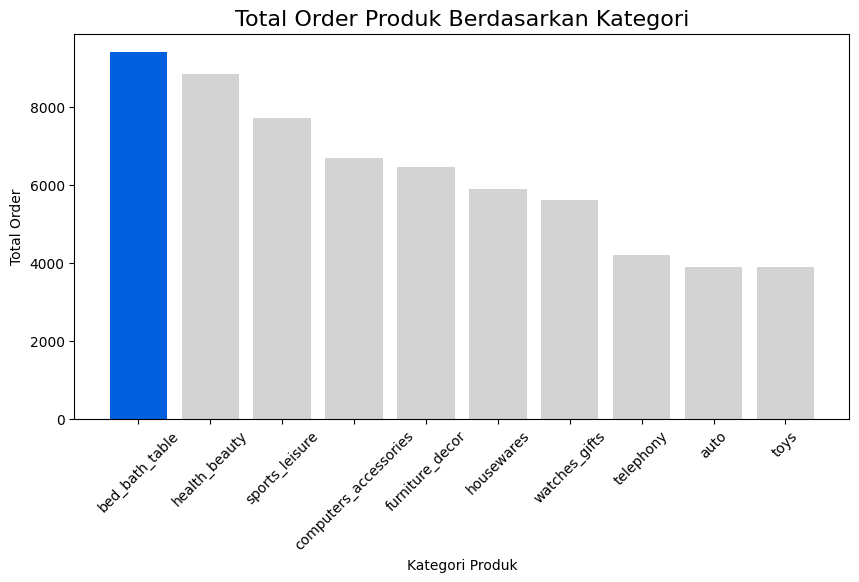

In [99]:
plt.figure(figsize=(10, 5))
plt.bar(
    x = order_by_cat_df["product_category"],
    height = order_by_cat_df["order_count"],
    color = ["#0060DE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)

plt.title("Total Order Produk Berdasarkan Kategori", loc="center", fontsize=16)
plt.xlabel("Kategori Produk")
plt.ylabel("Total Order")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Apa saja 10 kota yang memiliki total order tertinggi?

In [100]:
sales_by_city_df = order_cust_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)
sales_by_city_df = sales_by_city_df.reset_index()
sales_by_city_df.rename(columns={
    "order_id": "order_count",
    "customer_city": "city"
}, inplace=True)
sales_by_city_df.head()

,city,order_count
0,Sao Paulo,15540
1,Rio De Janeiro,6882
2,Belo Horizonte,2773
3,Brasilia,2131
4,Curitiba,1521


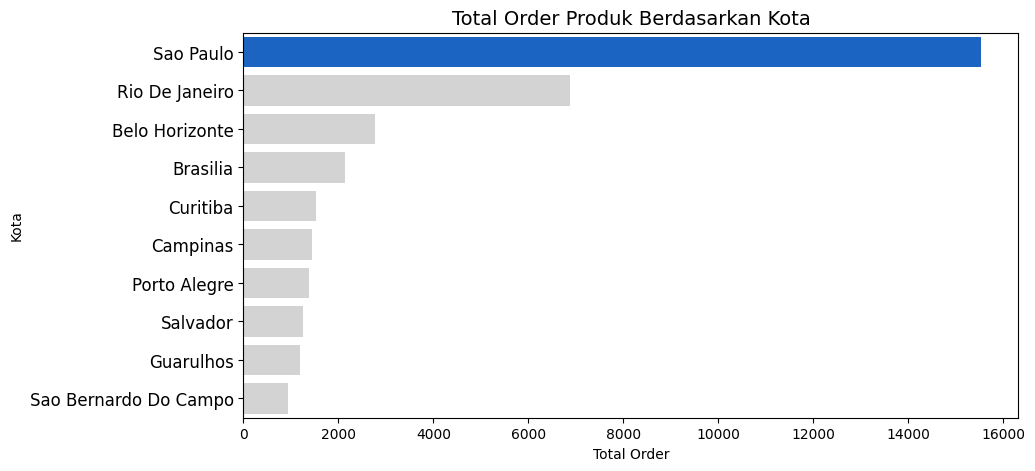

In [101]:
plt.figure(figsize=(10, 5))
colors = ["#0060DE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x = "order_count",
    y = "city",
    data = sales_by_city_df.sort_values(by="order_count", ascending=False),
    palette = colors
)
plt.title("Total Order Produk Berdasarkan Kota", loc="center", fontsize=14)
plt.xlabel("Total Order")
plt.ylabel("Kota")
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Bagaimana perbandingan jumlah antara tipe pembayaran?

In [102]:
payment_df = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
payment_df = payment_df.reset_index()
payment_df.head()

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528


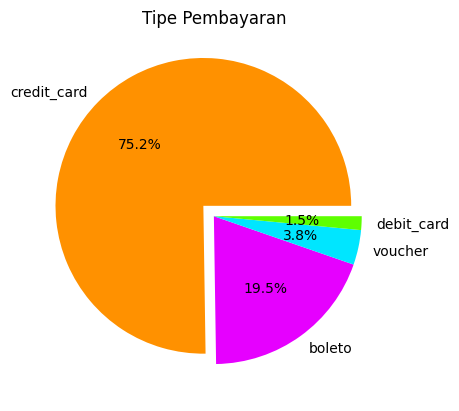

In [103]:
explode = (0.1, 0, 0, 0)
colors = ('#FF9100', '#E600FF', '#00E6FF', '#5EFF00')
plt.pie(
    x = payment_df['order_id'],
    labels = payment_df['payment_type'],
    autopct = '%1.1f%%',
    explode = explode,
    colors = colors
)
plt.title("Tipe Pembayaran")
plt.show()

### Bagaimana skor review order dari customer?

In [104]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,-,-,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,-,-,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,-,-,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,-,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,-,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [105]:
review_df = order_reviews_df.groupby(by="review_score").order_id.nunique()
review_df = review_df.reset_index()
review_df.rename(columns={
    "order_id": "order_count",
    "review_score": "score"
}, inplace=True)
review_df.head()

,score,order_count
0,1,11393
1,2,3148
2,3,8160
3,4,19098
4,5,57076


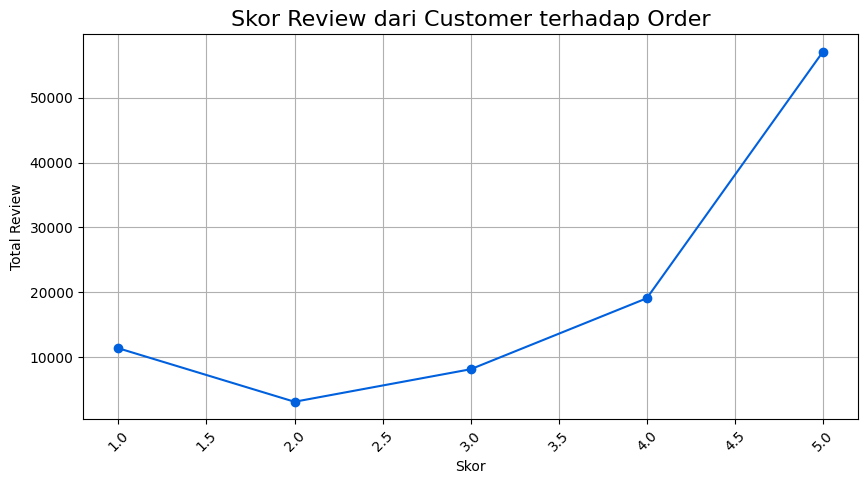

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(
    review_df["score"],
    review_df["order_count"],
    marker = "o",
    color = "#0060DE"
)
plt.grid(True)
plt.title("Skor Review dari Customer terhadap Order", loc="center", fontsize=16)
plt.xlabel("Skor")
plt.ylabel("Total Review")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## **Conclusion**

### Apa saja 10 kategori produk yang memiliki total order tertinggi?

Bed bath table, health beauty, sports leisure, hingga toys.

### Apa saja 10 kota yang memiliki total order tertinggi?

Sao Paulo, Rio De Janeiro, Belo Horizonte, hingga Sao Bernardo Do Campo.

### Bagaimana perbandingan jumlah antara tipe pembayaran?

Credit Card menduduki persentase terbesar yaitu 75.2%, disusul Boleto sebesar 19.5%, Voucher sebesar 3.8%, dan Debit Card sebesar 1.5%.

### Bagaimana skor kepuasan order dari customer?

Mayoritas customer memilih skor tertinggi yaitu 5, diikuti 4, 1, 3, 2.